In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D

# Simple example of $f(x)=x^2$

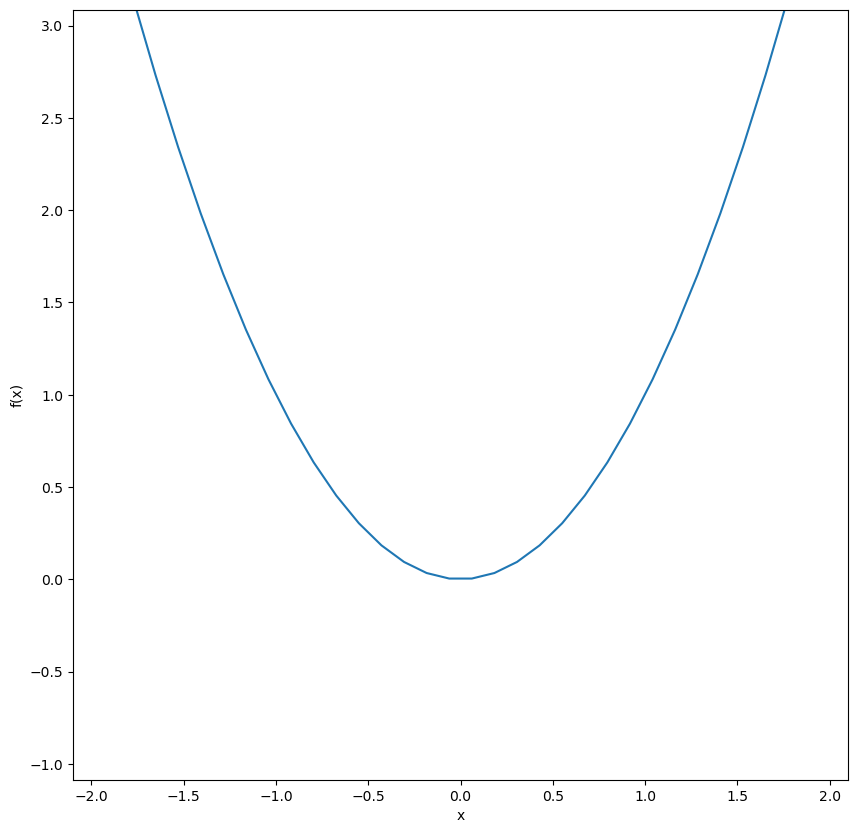

In [11]:
x = np.linspace(-3,3,50)
y = x**2
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim([-2.1, 2.1])
ax.set_ylim([0, 2])
ax.plot(x,y,label='f(x)=x^2')

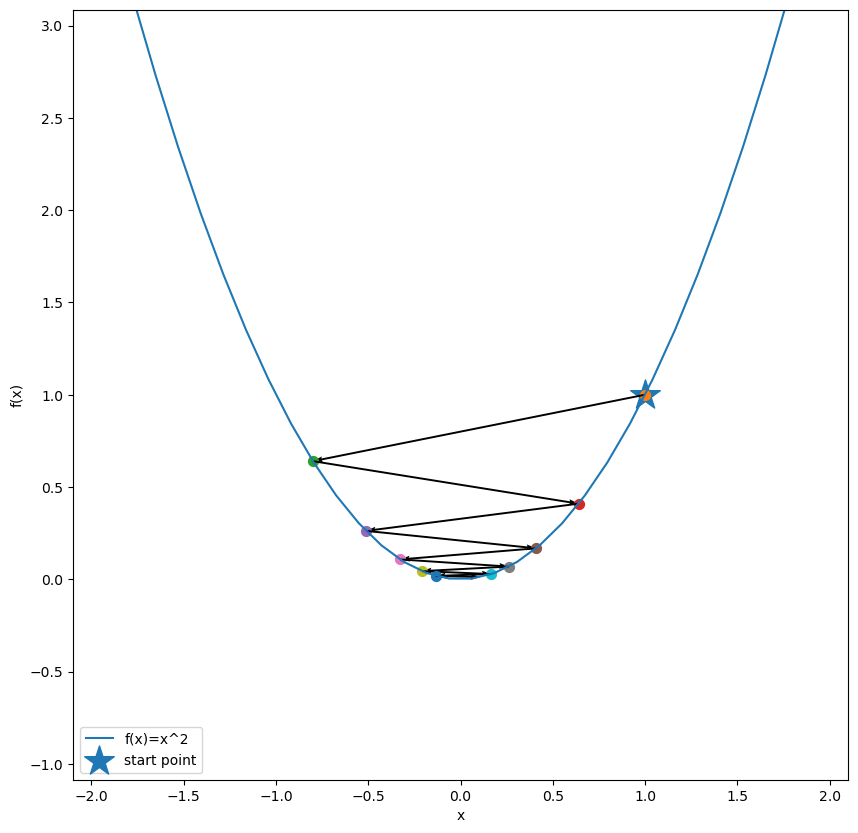

In [12]:
# start with random x
x_e = 1
#x_o = x_e
lam = 0.9#try learning rate 1.1,1,0.9
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim([-2.1, 2.1])
ax.set_ylim([0, 2])
ax.plot(x,y,label='f(x)=x^2')
cost = x_e**2
p0 = np.array([x_e,cost])
ax.scatter(p0[0],p0[1],marker='*',s=500,label='start point')
for i in range(10): 
    cost = x_e**2
    p0 = np.array([x_e,cost])
    ax.scatter(p0[0],p0[1],marker='o',s=50)
    #print(f'x = {x_e},cost = {cost}')
    x_e = x_e-lam*2*x_e
    cost = x_e**2
    p1 = np.array([x_e,cost])
    ax.quiver(*p0,*p1-p0,width=0.0025,scale=1, scale_units='xy', angles='xy')
plt.legend()
plt.show()


# Least Square Example

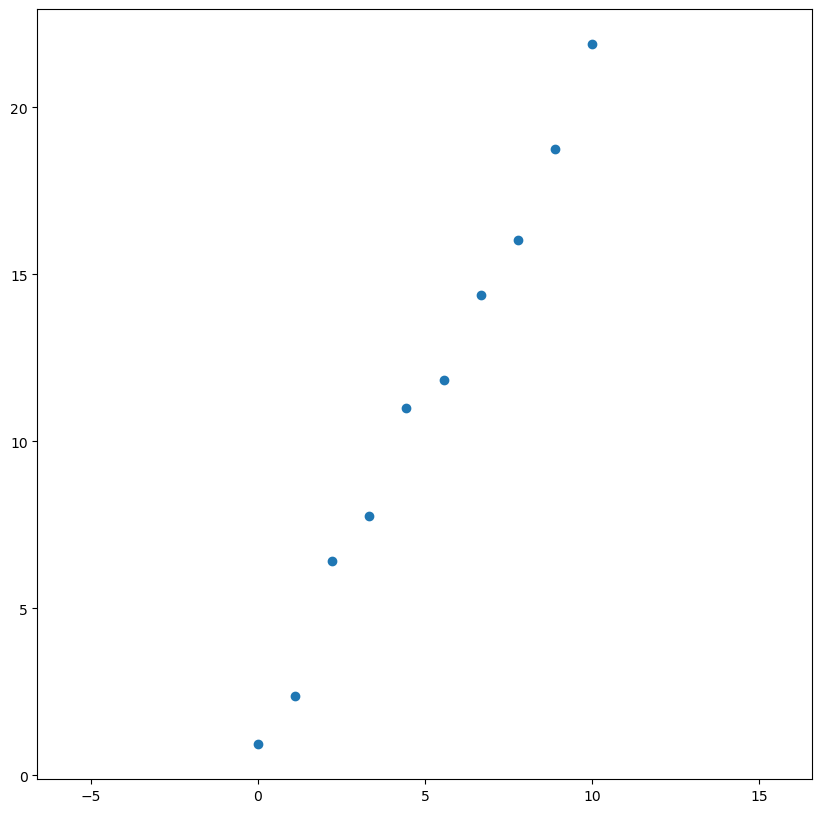

In [13]:
xp = np.linspace(0,10,10)
yp = 2*xp + 1 + np.random.randn(len(xp))
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.axis('equal')
ax.scatter(xp,yp)

slop = [2.02938983] and intercept = [0.98971143]


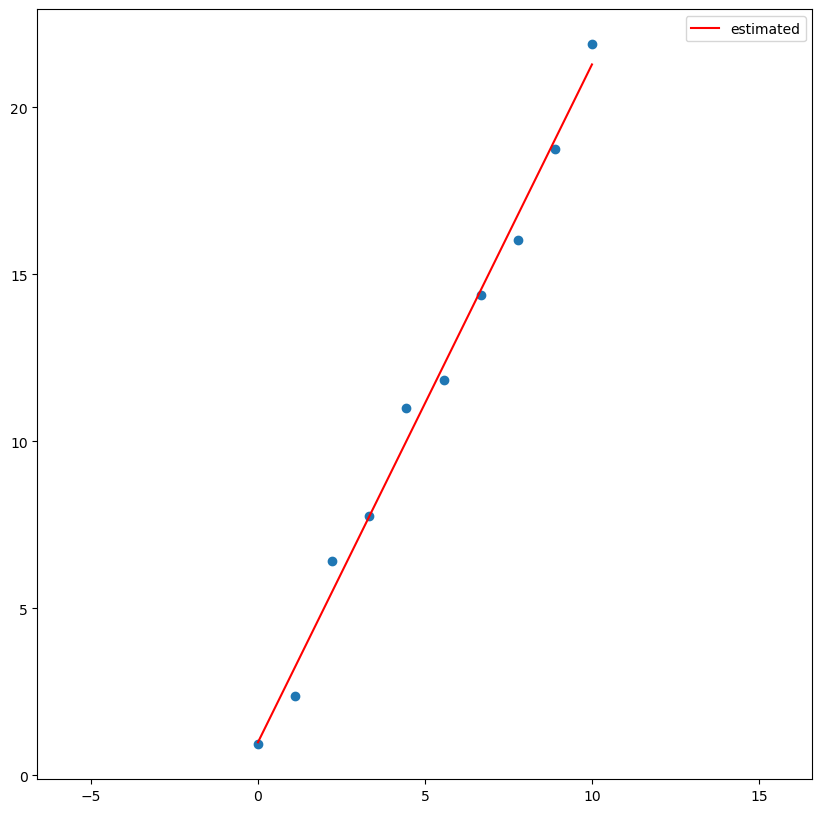

In [14]:
A = np.array([xp,np.ones(len(xp))]).T
b = np.reshape(yp,[len(xp),1])
x = np.linalg.inv(A.T @ A) @  A.T @ b
m = x[0]
c = x[1]
print(f'slop = {x[0]} and intercept = {x[1]}')
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.axis('equal')
ax.scatter(xp,yp)
y_e = m*xp+c
plt.plot(xp,y_e,'r',label='estimated')
plt.legend()
plt.show()


In [15]:
def compute_cost(A, b, m, c):
    x = np.array([m, c])
    residuals = A @ x - b
    return np.linalg.norm(residuals,2)

In [16]:
compute_cost(A, b, 1, 2)

79.21271016082784

cost = 98.80932859290088 slop = [0.76353014] and intercept = [0.11136661]
cost = 84.099159748849 slop = [1.25284246] and intercept = [0.18344304]
cost = 76.65782214932771 slop = [1.56638551] and intercept = [0.23033309]
cost = 72.65295392778012 slop = [1.76726336] and intercept = [0.26107709]
cost = 70.39918873584975 slop = [1.89592476] and intercept = [0.28146976]
cost = 69.1155678123145 slop = [1.97829678] and intercept = [0.29522543]
cost = 68.41019476862961 slop = [2.03099826] and intercept = [0.30472494]
cost = 68.06451616837522 slop = [2.06468166] and intercept = [0.31149438]
cost = 67.93507229139223 slop = [2.08617502] and intercept = [0.31651196]
cost = 67.91711879758725 slop = [2.09985502] and intercept = [0.3204047]


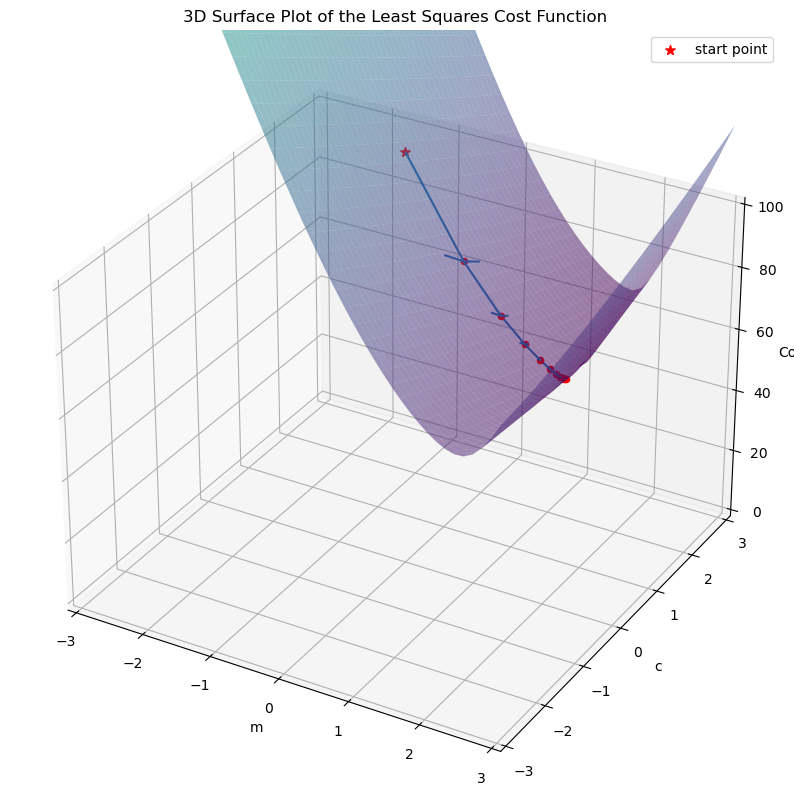

slop = [2.09985502] and intercept = [0.3204047]


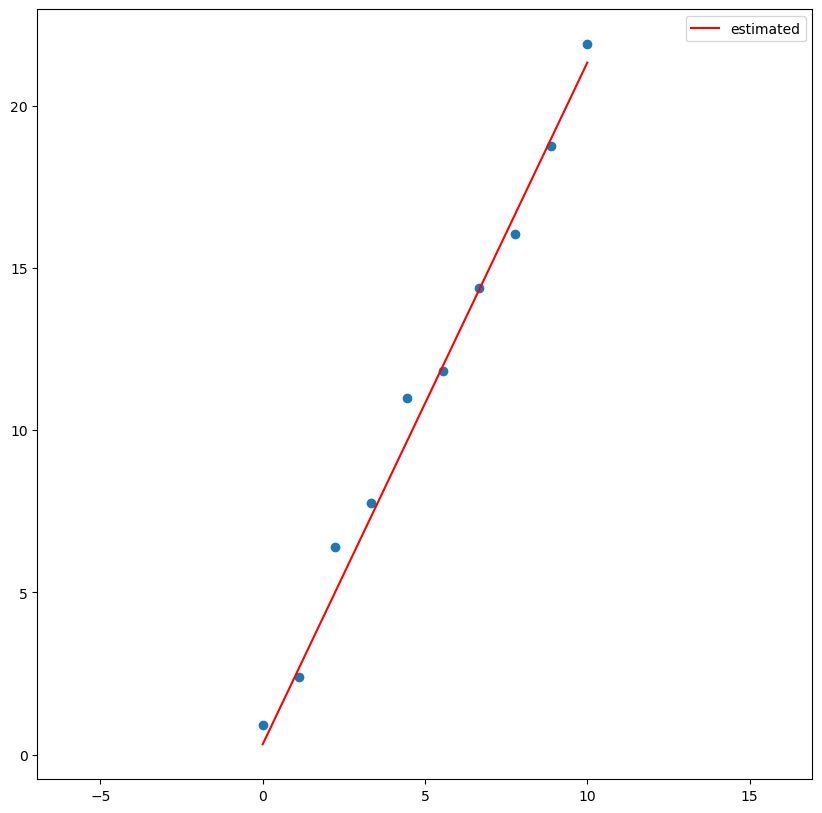

In [17]:
# start point
x = np.array([[0],[0]])
lam = 0.001 #learning rate

ms = np.linspace(-3,3,50)
cs = np.linspace(-3,3,50)
M , C = np.meshgrid(ms,cs)

# Compute cost surface
Z = np.array([[compute_cost(A, b, m, c) for m in ms] for c in cs])
#fig = plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x[0],x[1],compute_cost(A,b,x[0,0],x[1,0]),marker='*',color='r',s=50,label='start point')
ax.plot_surface(M, C, Z, cmap='viridis',alpha=0.5)
m = x[0,0]
c = x[1,0]
cost = compute_cost(A,b,m,c)
p0 = np.array([m,c,cost])
ax.scatter(m,c,cost,marker='*',color='r',s=50,label='start point')
#ax.view_init(elev=90, azim=100)

for i in range(10):
    grad = A.T @ A @ x-A.T @ b
    x = x - lam*grad
    m = x[0,0]
    c = x[1,0]
    cost = compute_cost(A,b,m,c)
    p1 = np.array([m,c,cost])
    ax.quiver(*p0,*p1-p0,length=1,arrow_length_ratio=0.03)
    ax.scatter(m,c,cost,marker='o',color='r',s=20)
    print(f'cost = {cost} slop = {x[0]} and intercept = {x[1]}')
    p0=p1
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 100])
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of the Least Squares Cost Function')
plt.legend()
plt.show()
m = x[0,0]
c = x[1,0]
print(f'slop = {x[0]} and intercept = {x[1]}')
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.axis('equal')
ax.scatter(xp,yp)
y_e = m*xp+c
ax.plot(xp,y_e,'r',label='estimated')
plt.legend()
plt.show()


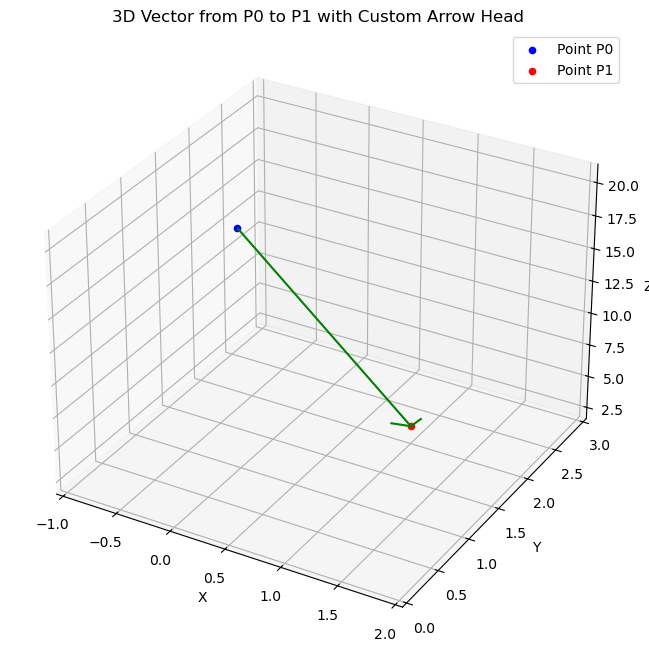

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define points
P0 = np.array([0, 1, 20])
P1 = np.array([1, 2, 3])

# Calculate the vector components
vector = P1 - P0

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(P0[0], P0[1], P0[2], color='b', label='Point P0')
ax.scatter(P1[0], P1[1], P1[2], color='r', label='Point P1')

# Plot the vector with custom arrow head settings
ax.quiver(P0[0], P0[1], P0[2], vector[0], vector[1], vector[2],
          color='g', length=1.0, arrow_length_ratio=0.03, pivot='tail')

# Set the limits to ensure the plot is to scale
ax.set_xlim([min(P0[0], P1[0])-1, max(P0[0], P1[0])+1])
ax.set_ylim([min(P0[1], P1[1])-1, max(P0[1], P1[1])+1])
ax.set_zlim([min(P0[2], P1[2])-1, max(P0[2], P1[2])+1])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector from P0 to P1 with Custom Arrow Head')
ax.legend()

plt.show()


# Pseudo Inverse vs Gradient descent

In [40]:
m = 1000
n = 5500
A = np.random.randn(m,n)
x = np.random.randn(n,1)
b = A @ x + np.random.randn(m,1)

In [41]:
st = time.time()
x_e = (np.linalg.inv(A.T @ A)) @  A.T @ b
stp = time.time()
print(f'time = {stp-st} error = {np.linalg.norm(x-x_e,2)}')

time = 9.909674882888794 error = 1638950.1614726924


In [42]:
lam = 0.0001 #learning rate
x_e2 = np.random.randn(n,1)
st = time.time()
for i in range(5):
    grad = A.T @ A @ x_e2 -A.T @ b
    x_e2 = x_e2 - lam*grad
stp = time.time()
print(f'time = {stp-st} error = {np.linalg.norm(x-x_e2,2)}')

time = 5.72786545753479 error = 94.73175034194296


In [37]:
x = np.ones(10)
y = np.random.rand(10)
b = 2*x+3*y
A = np.array([x,y]).T

In [38]:
A.shape

(10, 2)

In [39]:
A

array([[1.        , 0.53394509],
       [1.        , 0.37456249],
       [1.        , 0.22884492],
       [1.        , 0.91800331],
       [1.        , 0.15544443],
       [1.        , 0.02485971],
       [1.        , 0.25578817],
       [1.        , 0.92478478],
       [1.        , 0.86837366],
       [1.        , 0.43078269]])